<a href="https://colab.research.google.com/github/hawa1983/DATA602Project/blob/main/Project_Proposal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members**


*   Souleymane Doumbia
*   Fomba Kassoh



# Eploratory Data Analysis

Preliminary exploration will focus on distributions of numerical features such as ratings and revenue, as well as categorical features like genres and certificates, directors, and stars. Summary statistics will provide insights into mean, median, and mode for critical scores and box office revenue.

## Column Overview

**Basic Info:** Includes attributes like title, genre, certificate, release_year, runtime, etc.

**Ratings:** Metrics such as metascore_rating, actors_ratings, direction_ratings, and screenplay_ratings.
Award Info: Data on Oscars, BAFTA, and Golden Globes like oscars, oscar_nominations, bafta_awards, etc.

**Revenue:** Includes gross_revenue and derived metrics like normalized_revenue, weighted_gross_revenue, etc.
Binary Genre Flags: Each genre (Action, Comedy, Drama, etc.) has a binary flag indicating the presence of that genre.

**Awards** Includes Oscars, Bafta, and Golden Globes.

## Load the data into a data frame

 Let us have a quick glimpse into the dataset to allow us to see a few examples of the data *we* will be working with.

In [61]:
import pandas as pd

# Loading the dataset
file_path = 'https://raw.githubusercontent.com/hawa1983/DATA602Project/main/movies.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows and the summary of the dataset
data.head()


,ranking,title,genre,certificate,release_year,runtime,metascore_rating,directors,stars,votes,...,actors_atings,direction_atings,screenplay_ratings,oscars,oscar_nominations,bafta_awards,bafta_nominations,golden_globes,golden_globe_nominations,link
0,1,The Godfather,"['Crime', 'Drama']",R,-1972,175 min,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","2,005,492",...,5.0,5.0,5.0,3,11,0.0,4.0,6.0,8.0,https://www.imdb.com/title/tt0068646/
1,10,Lawrence of Arabia,"['Adventure', 'Biography', 'Drama']",Approved,-1962,218 min,100.0,T.E. Lawrence,"David Lean, Peter O'Toole, Alec Guinness, Anth...","313,473",...,5.0,5.0,5.0,7,10,4.0,5.0,4.0,7.0,https://www.imdb.com/title/tt0056172/
2,100,Yankee Doodle Dandy,"['Biography', 'Drama', 'Family']",Passed,-1942,126 min,89.0,George M. Cohan,"Michael Curtiz, James Cagney, Joan Leslie, Wal...","16,828",...,4.6,4.7,4.6,3,8,0.0,0.0,0.0,0.0,https://www.imdb.com/title/tt0035575/
3,11,Vertigo,"['Mystery', 'Romance', 'Thriller']",PG,-1958,128 min,100.0,Alfred Hitchcock,"James Stewart, Kim Novak, Barbara Bel Geddes, ...","425,858",...,5.0,5.0,5.0,0,2,0.0,0.0,0.0,0.0,https://www.imdb.com/title/tt0052357/
4,12,Psycho,"['Horror', 'Mystery', 'Thriller']",R,-1960,109 min,97.0,Alfred Hitchcock,"Anthony Perkins, Janet Leigh, Vera Miles, John...","716,579",...,5.0,5.0,5.0,0,4,0.0,0.0,1.0,1.0,https://www.imdb.com/title/tt0054215/


## Overview of the Data

Next we get an overview of the DataFrame, including the number of entries, the data types of columns, the count of non-null values, memory usage, and column names. This information will be crucial for assessing the dataset's structure, spotting missing data, and planning for necessary preprocessing steps.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ranking                   87 non-null     int64  
 1   title                     87 non-null     object 
 2   genre                     87 non-null     object 
 3   certificate               87 non-null     object 
 4   release_year              87 non-null     int64  
 5   runtime                   87 non-null     object 
 6   metascore_rating          85 non-null     float64
 7   directors                 87 non-null     object 
 8   stars                     87 non-null     object 
 9   votes                     87 non-null     object 
 10  gross_revenue             87 non-null     int64  
 11  actors_atings             87 non-null     float64
 12  direction_atings          87 non-null     float64
 13  screenplay_ratings        87 non-null     float64
 14  oscars      

## Summary Statistics

Below, we provide a statistical summary of numerical columns in the DataFrame, giving insights into the distribution of data values through metrics like mean, standard deviation, and quantiles. This helps us to identify patterns, outliers, and data skewness, informing data cleaning and preparation steps.

In [63]:
data.describe()

# Listing columns to exclude
columns_to_exclude = ['ranking', 'release_year']

# Selecting only the columns that are not in 'columns_to_exclude'
columns_to_include = data.columns.difference(columns_to_exclude)

# Describing only the columns that were not excluded
data[columns_to_include].describe()



,actors_atings,bafta_awards,bafta_nominations,direction_atings,golden_globe_nominations,golden_globes,gross_revenue,metascore_rating,oscar_nominations,oscars,screenplay_ratings
count,87.000000,75.000000,75.000000,87.000000,75.000000,75.00000,8.700000e+01,85.000000,87.000000,87.000000,87.000000
mean,4.857471,1.453333,4.173333,4.909195,3.893333,1.72000,8.747828e+07,87.764706,7.609195,3.459770,4.873563
std,0.141940,1.869335,3.334396,0.094785,2.496340,1.63211,1.161969e+08,10.043533,3.229070,2.952353,0.126178
min,4.500000,0.000000,0.000000,4.700000,0.000000,0.00000,1.918100e+04,61.000000,0.000000,0.000000,4.500000
25%,4.800000,0.000000,1.000000,4.800000,2.000000,0.00000,9.134514e+06,84.000000,5.000000,1.000000,4.800000
50%,4.900000,1.000000,4.000000,4.900000,4.000000,1.00000,4.478505e+07,90.000000,8.000000,3.000000,4.900000
75%,5.000000,2.000000,6.000000,5.000000,6.000000,3.00000,1.161176e+08,95.000000,10.000000,5.000000,5.000000
max,5.000000,8.000000,12.000000,5.000000,11.000000,6.00000,6.593254e+08,100.000000,14.000000,11.000000,5.000000


## Analysis of the distributions of numerical features

Here are the distributions for several numerical features:

  * Metascore Rating: Appears to have a bimodal distribution with peaks around low and high scores.
  * Actors Ratings, Direction Ratings, Screenplay Ratings: These ratings show right-skewed distributions, suggesting that lower ratings are more common, with fewer films receiving very high ratings.
  * Gross Revenue: This is also right-skewed, indicating that while most movies earn a moderate amount of revenue, a few outliers make significantly more.

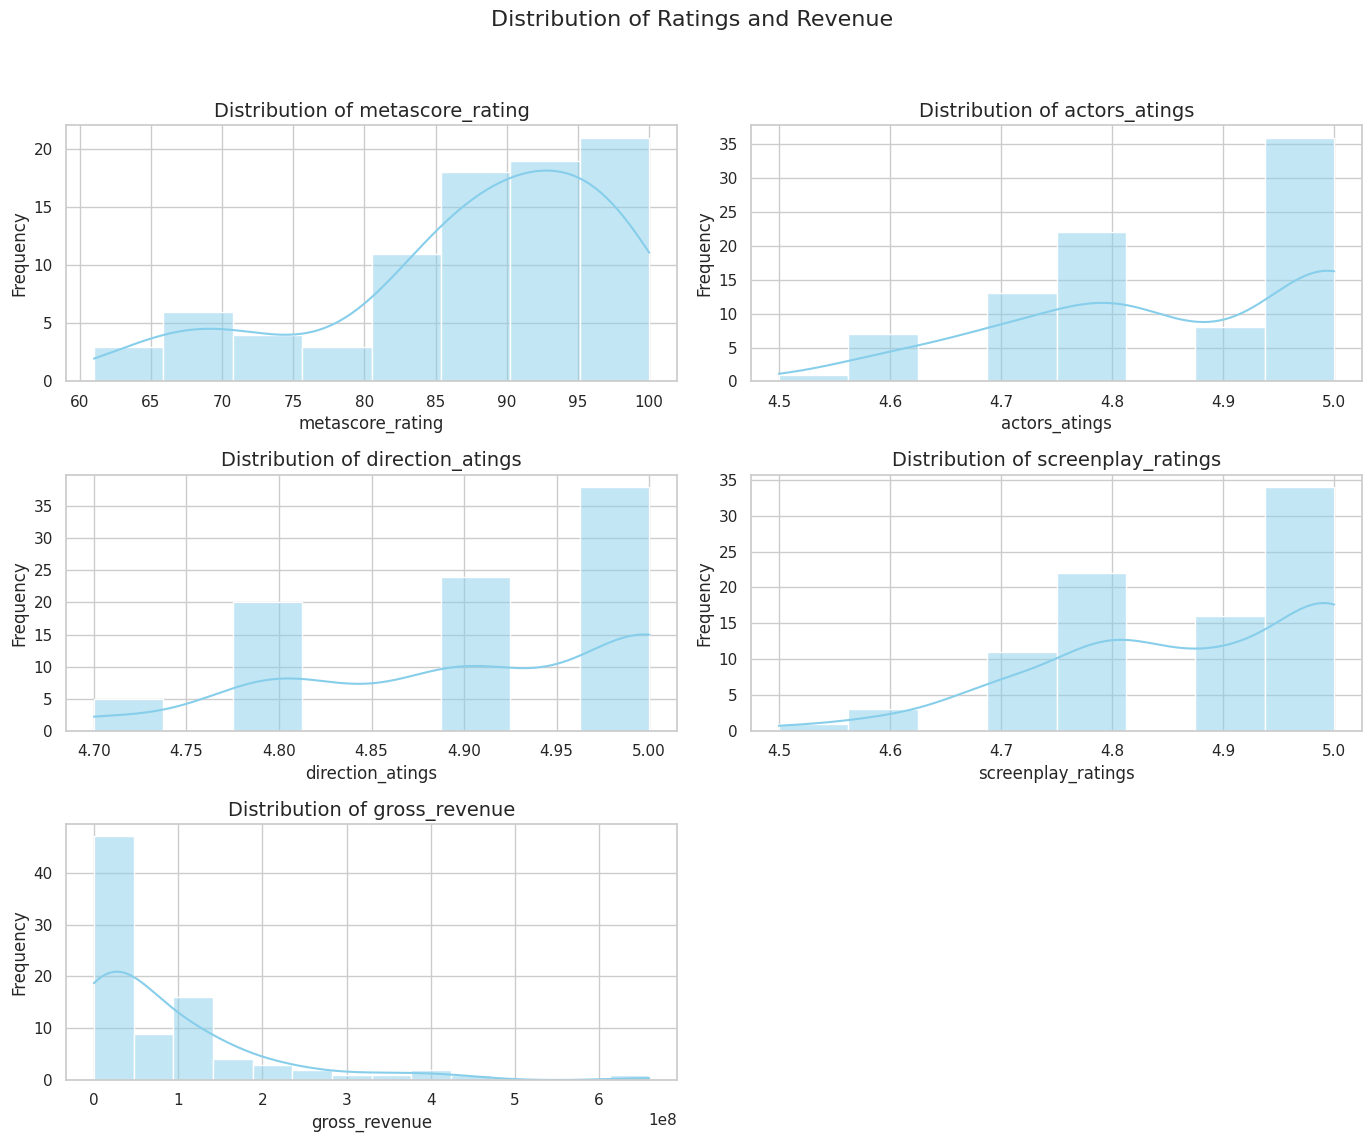

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot aesthetics
sns.set(style="whitegrid")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribution of Ratings and Revenue', fontsize=16)

# Listing numerical columns to plot
numerical_columns = ['metascore_rating', 'actors_atings', 'direction_atings', 'screenplay_ratings', 'gross_revenue']

# Plot histograms for numerical features
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(data[column], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiding extra subplot
axes[-1, -1].axis('off')

plt.show()


## Analysis of the distribution categorical features:
Here are the distributions for several numerical features:
* Count of Movies by Genre: Certain genres are more prevalent in the dataset, which might indicate popular genres for high-grossing or critically acclaimed movies.
* Count of Movies by Certificate: This shows the distribution of movie certificates, helping us understand the target audience demography.
* Top 10 Directors by Movie Count: Highlights directors who are frequently involved in high-performing movies.
* Top 10 Stars by Appearance: Shows which actors appear most frequently, potentially indicating popular or highly sought-after stars.



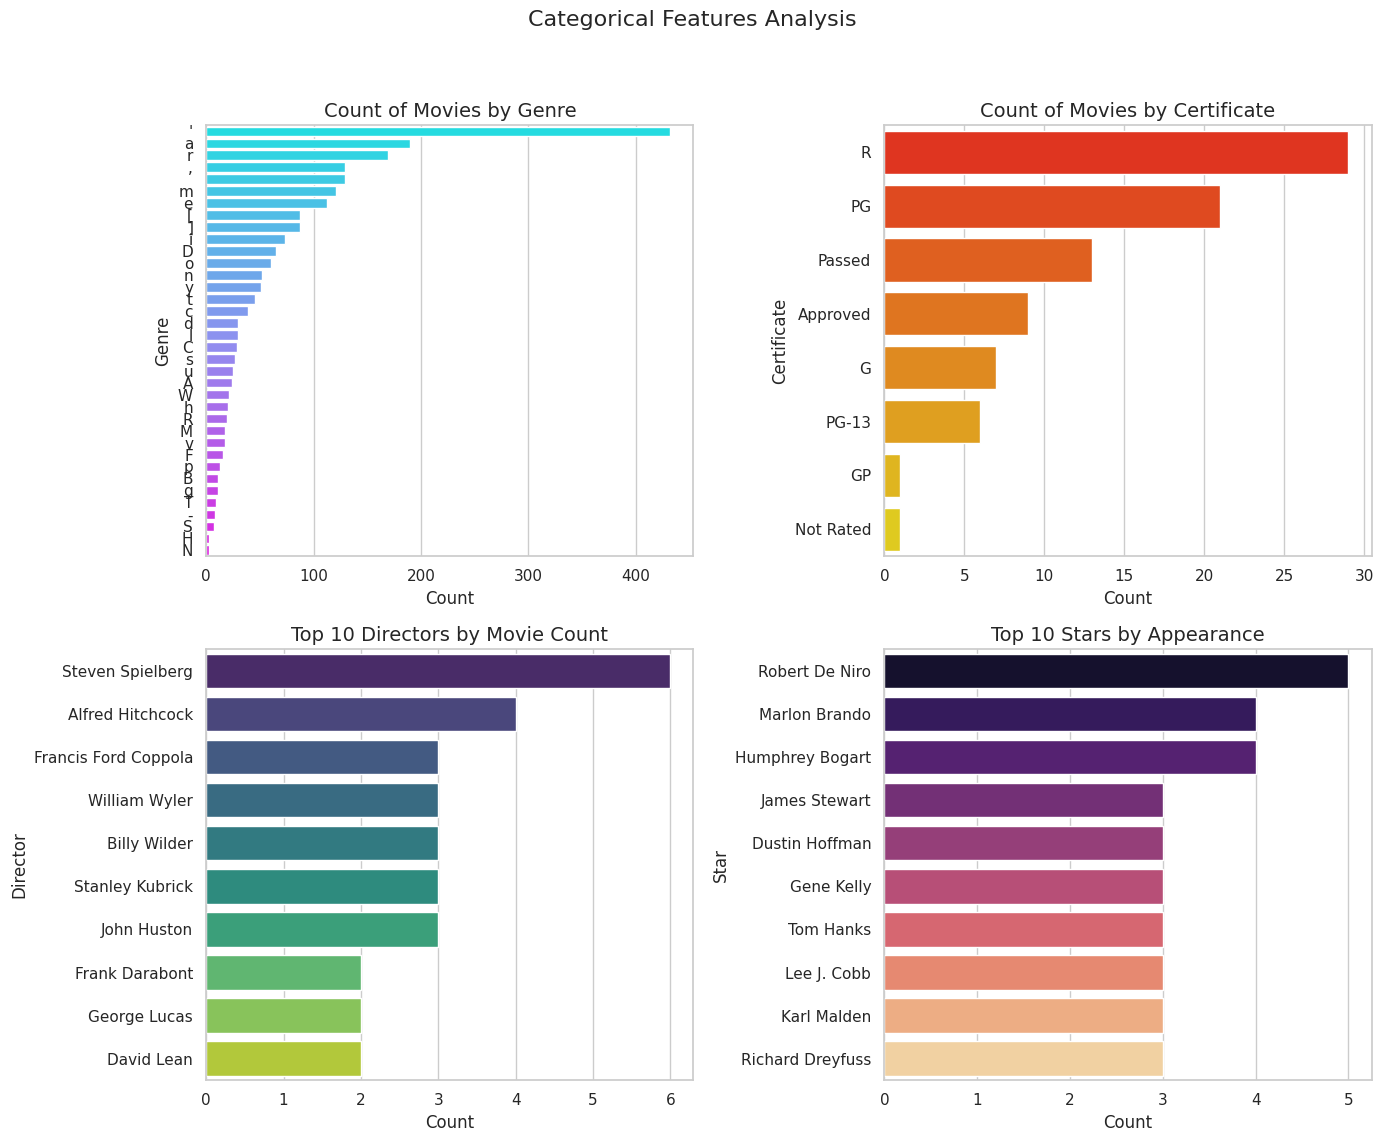

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a figure for categorical plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Categorical Features Analysis', fontsize=16)


# Flattening the 'genre' column into a single list of genres
all_genres = [genre for sublist in data['genre'] for genre in sublist]

# Converting the list of genres into a pandas Series
genres_series = pd.Series(all_genres)

# Getting the count of each genre
genres_count = genres_series.value_counts()

# Count of unique Certificate
certificates_count = data['certificate'].value_counts()

# Count of unique Directors
directors_count = data['directors'].value_counts().head(10)  # Top 10 directors

# Count of unique Stars
# Splitting stars as they are listed together, and getting the top 10
stars_series = data['stars'].str.split(', ', expand=True).stack()
stars_count = stars_series.value_counts().head(10)

# Plotting the categorical features
sns.barplot(x=genres_count.values, y=genres_count.index, ax=axes[0, 0], palette='cool', hue=genres_count.index, legend=False)
axes[0, 0].set_title('Count of Movies by Genre', fontsize=14)
axes[0, 0].set_xlabel('Count', fontsize=12)
axes[0, 0].set_ylabel('Genre', fontsize=12)

sns.barplot(x=certificates_count.values, y=certificates_count.index, ax=axes[0, 1], palette='autumn', hue=certificates_count.index, legend=False)
axes[0, 1].set_title('Count of Movies by Certificate', fontsize=14)
axes[0, 1].set_xlabel('Count', fontsize=12)
axes[0, 1].set_ylabel('Certificate', fontsize=12)

sns.barplot(x=directors_count.values, y=directors_count.index, ax=axes[1, 0], palette='viridis', hue=directors_count.index, legend=False)
axes[1, 0].set_title('Top 10 Directors by Movie Count', fontsize=14)
axes[1, 0].set_xlabel('Count', fontsize=12)
axes[1, 0].set_ylabel('Director', fontsize=12)

sns.barplot(x=stars_count.values, y=stars_count.index, ax=axes[1, 1], palette='magma', hue=stars_count.index, legend=False)
axes[1, 1].set_title('Top 10 Stars by Appearance', fontsize=14)
axes[1, 1].set_xlabel('Count', fontsize=12)
axes[1, 1].set_ylabel('Star', fontsize=12)

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## Summary Statistics for Selected Variables

The summary statistics indicate high and consistent ratings for metascore, actors, direction, and screenplay, predominantly nearing the top score of 5. Votes, however, exhibit a broad spread with a mean significantly higher than the median, suggesting a right-skewed distribution where a smaller number of films have garnered a large number of votes. Gross revenue displays considerable variability, with the mean greatly exceeding the median, reflecting that a select few films generate exceptionally high revenue, which skews the average upwards.

In [66]:
import pandas as pd

# Removing comma separators from 'votes' and convert to integers
data['votes'] = data['votes'].str.replace(',', '').astype(int)

# Defining the columns for which to calculate summary statistics
summary_stats_columns = [
    'votes', 'metascore_rating', 'actors_atings',
    'direction_atings', 'screenplay_ratings', 'gross_revenue'
]

# Calculating mean, median, and standard deviation
mean_median_std_stats = data[summary_stats_columns].agg(['mean', 'median', 'std'])

# Calculating mode separately and ensuring it's in a compatible format
mode_stats = data[summary_stats_columns].mode().iloc[0]
mode_stats.name = 'mode'  # Naming the Series for easier concatenation

# Combining mean, median, and mode into a single DataFrame
summary_stats = pd.concat([mean_median_std_stats, mode_stats.to_frame().T])

summary_stats



,votes,metascore_rating,actors_atings,direction_atings,screenplay_ratings,gross_revenue
mean,589321.919540,87.764706,4.857471,4.909195,4.873563,8.747828e+07
median,361373.000000,90.000000,4.900000,4.900000,4.900000,4.478505e+07
std,602481.966421,10.043533,0.141940,0.094785,0.126178,1.161969e+08
mode,16828.000000,97.000000,5.000000,5.000000,5.000000,4.360000e+06


## Missing value information

We can observe from the missing values below that metascore_rating has a small percentage of missing values (approximately 2.3%), while the columns for bafta_awards, bafta_nominations, golden_globes, and golden_globe_nominations each have about 13.79% missing values.

The minimum release year among movies with missing bafta_awards and golden_globes data is 1944, which is also the founding year of the Golden Globe Awards and slightly predates the establishment of the BAFTA Awards by a few years. This suggests that some of the missing award data could indeed be due to movies being released before the respective award organizations were founded.

In [67]:
# Calculating the total number of rows in the DataFrame
total_rows = len(data)

# Calculating the number of missing values for each column
missing_values = data.isnull().sum()

# Calculating the percentage of missing values for each column and rounding to four decimal places
missing_percentage = ((missing_values / total_rows) * 100).round(4)

# Filtering out columns with no missing values and creating a DataFrame with the count and percentage of missing values
missing_stats = pd.DataFrame({
    'Missing Values': missing_values[missing_values > 0],
    'Percentage': missing_percentage[missing_values > 0]
})

missing_stats


,Missing Values,Percentage
metascore_rating,2,2.2989
bafta_awards,12,13.7931
bafta_nominations,12,13.7931
golden_globes,12,13.7931
golden_globe_nominations,12,13.7931
